In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 

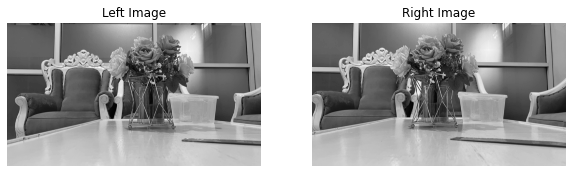

In [11]:
imgL = cv2.imread('left.jpg', cv2.IMREAD_GRAYSCALE)
imgR = cv2.imread('right.jpg', cv2.IMREAD_GRAYSCALE) 

plt.figure(figsize=(10, 4))
plt.subplot(1,2,1), plt.imshow(imgL, cmap='gray'), plt.title('Left Image'), plt.axis('off')
plt.subplot(1,2,2), plt.imshow(imgR, cmap='gray'), plt.title('Right Image'), plt.axis('off')
plt.show()

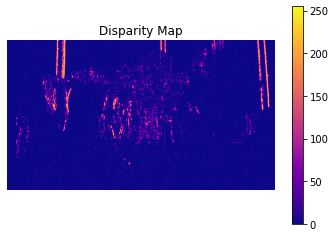

In [16]:
# Stereo matching using StereoBM
stereo = cv2.StereoBM_create(numDisparities=128, blockSize=15)
disparity = stereo.compute(imgL, imgR)

# Normalize the disparity map for visualization 
disparity = cv2.normalize(disparity, None, 0, 255, cv2.NORM_MINMAX)
disparity = np.uint8(disparity)
plt.imshow(disparity, cmap='plasma')
plt.title('Disparity Map'), plt.axis('off')
plt.colorbar()
plt.show()

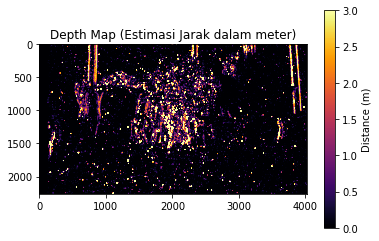

In [34]:
# Asumsikan parameter kalibrasi
focal_length_px = 10000   # asumsi dalam piksel
baseline_m = 0.06       # misal: 6 cm antara dua posisi kamera

# Hitung depth map
depth_map = np.zeros(disparity.shape, dtype=np.float32)
valid_disp = disparity > 0
depth_map[valid_disp] = (focal_length_px * baseline_m) / disparity[valid_disp]

plt.imshow(depth_map, cmap='inferno', vmax=3)
plt.title('Depth Map (Estimasi Jarak dalam meter)')
plt.colorbar(label='Distance (m)')
plt.show()

In [27]:
x, y = 900, 600  
print(f"Disparity: {disparity[y, x]}")
print(f"Estimated Distance: {depth_map[y, x]:.2f} m")

Disparity: 0
Estimated Distance: 0.00 m
